# Exercise Eight: Cultural Data

For this exercise, pick a dataset of current or historical cultural data available in CSV format from one of the suggeted sources, or your own research. This will be easiest if your data includes some element of information over time. You'll be using the "group by" methods we discussed this week to make comparisons within the dataset: you might group by geography, party affiliation, age, gender, or other information marked in the dataset.

Your annotated code should include headings, and discuss your findings as well as the limitations in what you can visualize using this approach. This exercise should:

- Import your selected structured CSV data
- Use Pandas to note any preliminary trends in the CSV as a dataframe
- Use "group by" to break down at least two different subsets of data
- Plot a comparison between the grouped data (this will be easiest over time)
- Use one additional form of analysis or visualization from any we've tried so far

## Stage One. Import Structured CSV Data (bonus: from multiple files)

In [28]:
import pandas as pd
import os
path = "happiness/"
years = []
df_list = []

with os.scandir(path) as entries:
    for entry in entries:
        years.append(entry.name)
        temp_df = pd.read_csv(f'{path}{entry.name}')
        df_list.append(temp_df)
        
print(years[1])
print(df_list[1].head())



2016.csv
       Country          Region  Happiness Rank  Score  \
0      Denmark  Western Europe               1  7.526   
1  Switzerland  Western Europe               2  7.509   
2      Iceland  Western Europe               3  7.501   
3       Norway  Western Europe               4  7.498   
4      Finland  Western Europe               5  7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56

## Stage Two: Explore and note differences in headings / datatypes over the years

In [29]:
[print(df.dtypes) for df in df_list]

Country                           object
Region                            object
Happiness Rank                     int64
Score                            float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
Country                           object
Region                            object
Happiness Rank                     int64
Score                            float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dy

[None, None, None, None, None]

In [33]:
[print(df['Country'].head()) for df in df_list]

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
Name: Country, dtype: object
0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
Name: Country, dtype: object
0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
Name: Country, dtype: object
0        Finland
1         Norway
2        Denmark
3        Iceland
4    Switzerland
Name: Country, dtype: object
0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
Name: Country, dtype: object


[None, None, None, None, None]

## Stage Three: Use Groupby to Explore (by Region)

Note this sample shows only one example, two are required for the exercise itself

In [41]:
close_region = df_list[1].groupby('Region')
close_region.get_group('Western Europe').head()

,Country,Region,Happiness Rank,Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [47]:
print(close_region['Score'].mean())
print(close_region['Health (Life Expectancy)'].mean())

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Score, dtype: float64
Region
Australia and New Zealand          0.841080
Central and Eastern Europe         0.631592
Eastern Asia                       0.806680
Latin America and Caribbean        0.612703
Middle East and Northern Africa    0.616438
North America                      0.803300
Southeastern Asia                  0.561369
Southern Asia                      0.453670
Sub-Saharan Africa                 0.239872
Western Europe                     0.825754
Name: Health (Life Expectancy), dtype: float64


## Stage Four: Plot Grouped Data

Central
and
Eastern
Europe


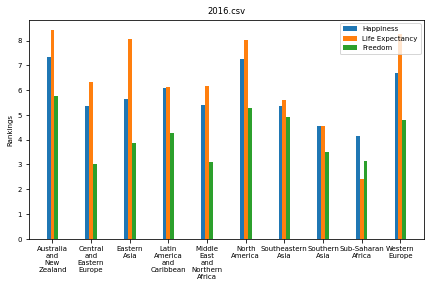

In [93]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 7})

regions = close_region['Region'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['Score'].mean(), width, label='Happiness')
rects2 = ax.bar(x, close_region['Health (Life Expectancy)'].mean()*10, width, label='Life Expectancy')
rects3 = ax.bar(x + width, close_region['Freedom'].mean()*10, width, label='Freedom')


ax.set_ylabel('Rankings')
ax.set_title(years[1])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()